# Source Node
0 -> 1

Documentation: http://geopandas.org/io.html

In [3]:
# PARAMETERS
# Gebruik altijd raw strings (r''). Backslash (\) is namelijk de Python escape character.
folder = r'/home/ab/Documents/Open-data/shapefiles/shp-gemeente'
filename = r'gemeente-grenzen.shp'

# SOURCE NODE
from os.path import join
import geopandas as gpd
from convert import gdf_to_df

# Read the file
print('Reading file:', join(folder, filename))
gdf = gpd.read_file( join(folder, filename) )

# Reproject to coordinate reference system WGS84 (long/lat)
# This HAS to be done here, because we'll lose the CRS when proceeding to the next node
# WGS84 is the official standard for GeoJSON: https://tools.ietf.org/html/rfc7946#section-4
wgs84 = {'init': 'epsg:4326'}
if gdf.crs != wgs84:
    # If there is no CRS in the shapefile reprojecting is not possible
    try:
        #print('Initial CRS:', gdf.crs)
        print('Reprojecting to WGS84...')
        gdf = gdf.to_crs(wgs84)
    except:
        print('Unable to set WGS84. No initial CRS found in shapefile. Please verify the coordinates manually.')

# Output
output_table = gdf_to_df(gdf)

Reading file: /home/ab/Documents/Open-data/shapefiles/shp-gemeente/gemeente-grenzen.shp
Reprojecting to WGS84...


## Develop
Below is for development purposes only. Writing to and reading from a CSV file enables me to mimic `input_table` and `output_table` in KNIME.

,GM_CODE,GM_NAAM,WATER,OAD,STED,AANT_INW,AANT_MAN,AANT_VROUW,P_00_14_JR,P_15_24_JR,...,P_HH_M_K,GEM_HH_GR,P_WEST_AL,P_N_W_AL,P_MAROKKO,P_ANT_ARU,P_SURINAM,P_TURKIJE,P_OVER_NW,wkt
0,GM0003,Appingedam,NEE,1051,3,11801,5751,6050,15,10,...,31,2.1,7,7,0,1,1,2,3,"POLYGON ((6.886217543190435 53.34369167573075,..."
1,GM0005,Bedum,NEE,685,4,10475,5235,5240,16,11,...,36,2.3,4,3,0,0,0,0,3,"POLYGON ((6.580421699515444 53.34633391502173,..."
2,GM0009,Ten Boer,NEE,372,5,7292,3616,3676,18,12,...,39,2.4,4,3,0,0,0,0,2,"POLYGON ((6.741621159390743 53.3130904277085, ..."
3,GM0010,Delfzijl,NEE,677,4,24864,12475,12389,14,11,...,31,2.1,8,10,0,3,1,2,4,MULTIPOLYGON (((7.101629870869564 53.323614972...
4,GM0014,Groningen,NEE,3456,1,202810,101299,101511,12,24,...,18,1.6,12,12,1,2,2,1,8,"POLYGON ((6.550311534349436 53.26543298511037,..."


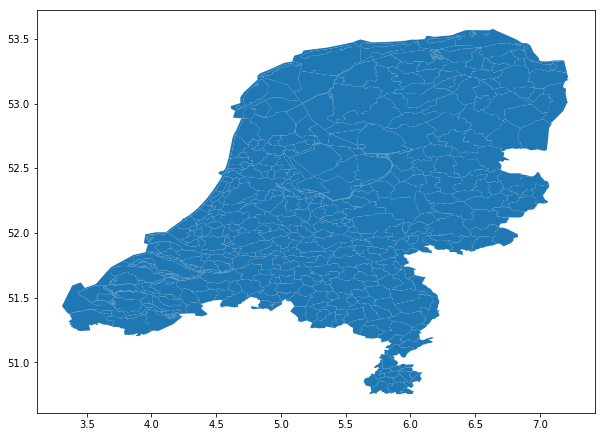

In [4]:
# Write to input/output table
output_table.to_csv('io-table.csv', index=False)

# Show please
display(output_table.head())
%matplotlib inline
gdf.plot(figsize = (10, 10));

Q: Is CRS really lost when converted to `df`?

A: Yes I think so. Even when converted to GeoJSON. See the link in the source code above.